<a href="https://colab.research.google.com/github/danielpatrickhug/GitModel/blob/main/community_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/danielpatrickhug/GitModel.git

Cloning into 'GitModel'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 453 (delta 123), reused 100 (delta 34), pack-reused 195
Receiving objects: 100% (453/453), 1.62 MiB | 6.61 MiB/s, done.
Resolving deltas: 100% (221/221), done.


In [24]:
%%capture
%%bash
pip install python-louvain

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv("/content/gitmodel_topic_info_0.csv")
df

,Unnamed: 0,Topic,Count,Name,Rep_docs
0,0,-1,300,-1_Function for evaluating hint predictions on...,"[""This function takes three arguments: `hints`..."
1,1,0,639,0_Creating a Sampler for Dataset Splits with V...,"['```def make_sampler(length: int,\n ..."
2,2,1,438,1_Decoders construction using Linear function ...,"['```def construct_decoders(loc: str, t: str, ..."
3,3,2,427,2_Document Representation and Topic Modeling w...,"['```def reduce_outliers(topic_model, data, to..."
4,4,3,392,3_Shortest path graph generation with Floyd-Wa...,"['```class FloydWarshallSampler(Sampler):\n ""..."
...,...,...,...,...,...
185,185,184,12,184_Understanding the difference and purpose o...,['What is the difference between `BaselineMode...
186,186,185,11,185_MaxSubarraySampler class purpose and usage___,['What is the purpose of the `MaxSubarraySampl...
187,187,186,11,186_Improving Mobile App User Experience with ...,"[""This code also appears to be related to mach..."
188,188,187,11,187_Understanding the _expand_to function in n...,['What does the `_expand_to` function do and h...


In [5]:
df = pd.read_csv("/content/gitmodeltopic_model_outputs_0.csv")
df

,Unnamed: 0,query,_id,topic,prob
0,0,What is the purpose of the `get_repo_contents`...,0,12,1.000000
1,1,```def get_repo_contents(git_repo_path):\n ...,1,6,0.571851
2,2,What is the purpose of the `decompose_repo` fu...,2,0,1.000000
3,3,"```def decompose_repo(contents, git_repo_path,...",3,0,0.395584
4,4,What is the purpose of the `format_system_prom...,4,0,0.481301
...,...,...,...,...,...
587,587,"```def compose_inference(text_block, messages)...",587,0,0.767332
588,588,The `process_transcript` function takes in sev...,588,0,1.000000
589,589,"```def process_transcript(segments, file_name,...",589,0,1.000000
590,590,This code defines a function `embed_data` that...,590,0,1.000000


In [6]:
data = pd.read_json("/content/gitmodel_self-instruction.jsonl", lines=True)
data

,git_repo_path,file_name,code_type,system_task,system_prompt,conversation_history,assistant_reply
0,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The purpose of this code is to define a `Confi...
1,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The `Config` class takes four parameters in it...
2,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The purpose of the `from_yaml` class method is...
3,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The `yaml.safe_load` function is used to safel...
4,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The expected format of the YAML file that is b...
...,...,...,...,...,...,...,...
231,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The `SemanticGraphContextGenerator` class is a...
232,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The `config` parameter in the `__init__` metho...
233,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The `get_repo_contents` method takes a `git_re...
234,/Users/danielhug/GitModelT/GitModel/work/gitmodel,/Users/danielhug/GitModelT/GitModel/work/gitmo...,classes,self-instruction,\n GitHub repository: /Users/daniel...,"[{'role': 'system', 'content': ' G...",The `chat_gpt_inference` method is used to gen...


In [7]:
%cd GitModel

/content/GitModel


In [8]:
%%capture
%%bash
pip install -r requirements.txt

In [9]:
import numpy as np
from sentence_transformers import SentenceTransformer
import torch
from torch import Tensor
import pandas as pd
import math
import numpy as np
import scipy
from bertopic import BERTopic
from bertopic.representation import OpenAI
from bertopic.representation import MaximalMarginalRelevance
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import torch
import torch.nn.functional as F
from torch import Tensor

In [10]:
def embed_data(data, key='query', model_name='all-MiniLM-L6-v2', cores=1, gpu=False, batch_size=128):
    """
    Embed the sentences/text using the MiniLM language model (which uses mean pooling)
    """
    print('Embedding data')
    model = SentenceTransformer(model_name)
    print('Model loaded')

    sentences = data[key].tolist()
    unique_sentences = data[key].unique()
    print('Unique sentences', len(unique_sentences))

    if cores == 1:
        embeddings = model.encode(unique_sentences, show_progress_bar=True, batch_size=batch_size)
    else:
        devices = ['cpu'] * cores
        if gpu:
            devices = None  # use all CUDA devices

        # Start the multi-process pool on multiple devices
        print('Multi-process pool starting')
        pool = model.start_multi_process_pool(devices)
        print('Multi-process pool started')

        chunk_size = math.ceil(len(unique_sentences) / cores)

        # Compute the embeddings using the multi-process pool
        embeddings = model.encode_multi_process(unique_sentences, pool, batch_size=batch_size, chunk_size=chunk_size)
        model.stop_multi_process_pool(pool)

    print("Embeddings computed")

    mapping = {sentence: embedding for sentence, embedding in zip(unique_sentences, embeddings)}
    embeddings = np.array([mapping[sentence] for sentence in sentences])
  
    return embeddings

In [11]:
#kernel
def cos_sim(a: Tensor, b: Tensor):
    """
    Computes the cosine similarity cos_sim(a[i], b[j]) for all i and j.
    :return: Matrix with res[i][j]  = cos_sim(a[i], b[j])
    """
    if not isinstance(a, torch.Tensor):
        a = torch.tensor(np.array(a))

    if not isinstance(b, torch.Tensor):
        b = torch.tensor(np.array(b))

    if len(a.shape) == 1:
        a = a.unsqueeze(0)

    if len(b.shape) == 1:
        b = b.unsqueeze(0)

    a_norm = torch.nn.functional.normalize(a, p=2, dim=1)
    b_norm = torch.nn.functional.normalize(b, p=2, dim=1)
    return torch.mm(a_norm, b_norm.transpose(0, 1))

In [12]:
MODEL_NAME = "all-MiniLM-L6-v2" #"allenai-specter"#
embs = embed_data(data,model_name=MODEL_NAME, key ='assistant_reply')

Embedding data


Model loaded
Unique sentences 198


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Embeddings computed


In [13]:
threshold = 0.7

In [14]:
def compute_kernel_with_activation_fn(embs, activation_fn=F.relu, kernel_type="cosine"):
    # match case to kernel type
    if kernel_type == "cosine":
        A = cos_sim(embs, embs)
    A = activation_fn(A)
    adj_matrix = torch.zeros_like(A)
    adj_matrix[A > threshold] = 1
    adj_matrix[A <= threshold] = 0
    adj_matrix = adj_matrix.numpy().astype(np.float32)
    return adj_matrix

def degree_matrix(A):
    """
    compute degree matrix using adjacency distance matrix from pairwise distances
    :A: nxn size matrix embedding minmaxed using mu sigma and pairwise distances
    :return: degree matrix
    """
    n = A.shape[0]
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(A[i, :])
    return D


def graph_laplacian(A):
    """
    compute graph laplacian using degree and adjacency matrix from pairwise distances
    :A: nxn size matrix embedding minmaxed using mu sigma and pairwise distances
    :return: graph laplacian, and degree matrix
    """
    D = degree_matrix(A)
    L = D - A
    return L, D

def compute_regularized_kernel(embs, threshold=0.65):
    A = cos_sim(embs, embs)
    adj_matrix = torch.zeros_like(A)
    adj_matrix[A > threshold] = 1
    adj_matrix[A <= threshold] = 0
    adj_matrix = adj_matrix.numpy().astype(np.float32)
    return adj_matrix

In [15]:
A = compute_regularized_kernel(embs)

In [16]:
import numpy as np
import scipy.sparse as sp
from tqdm import tqdm


def k_hop_message_passing(A, node_features, k):
    """
    Compute the k-hop adjacency matrix and aggregated features using message passing.

    Parameters:
    A (numpy array): The adjacency matrix of the graph.
    node_features (numpy array): The feature matrix of the nodes.
    k (int): The number of hops for message passing.

    Returns:
    A_k (numpy array): The k-hop adjacency matrix.
    agg_features (numpy array): The aggregated feature matrix for each node in the k-hop neighborhood.
    """

    print("Compute the k-hop adjacency matrix")
    A_k = np.linalg.matrix_power(A, k)

    print("Aggregate the messages from the k-hop neighborhood:")
    agg_features = node_features.copy()

    for i in tqdm(range(k)):
        agg_features += np.matmul(np.linalg.matrix_power(A, i + 1), node_features)

    return A_k, agg_features

In [22]:
def dfs(v, visited, adj_matrix, component):
    visited[v] = True
    component.append(v)
    for i, val in enumerate(adj_matrix[v]):
        if val > 0 and not visited[i]:
            dfs(i, visited, adj_matrix, component)

def connected_components(adj_matrix):
    visited = [False for _ in range(adj_matrix.shape[0])]
    components = []

    for v in range(adj_matrix.shape[0]):
        if not visited[v]:
            component = []
            dfs(v, visited, adj_matrix, component)
            components.append(component)

    return components




In [18]:
A_k, node_embs = k_hop_message_passing(A, embs, 2)

Compute the k-hop adjacency matrix
Aggregate the messages from the k-hop neighborhood:


100%|██████████| 2/2 [00:00<00:00, 257.25it/s]


In [19]:
A_k3, node_embs3 = k_hop_message_passing(A, embs, 3)

Compute the k-hop adjacency matrix
Aggregate the messages from the k-hop neighborhood:


100%|██████████| 3/3 [00:00<00:00, 1457.71it/s]


In [20]:
A_k4, node_embs4 = k_hop_message_passing(A, embs, 4)


Compute the k-hop adjacency matrix
Aggregate the messages from the k-hop neighborhood:


100%|██████████| 4/4 [00:00<00:00, 1823.61it/s]


In [47]:
import numpy as np
import matplotlib.pyplot as plt

def laplacian_matrix(adj_matrix):
    degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
    lap_matrix = degree_matrix - adj_matrix
    return lap_matrix


In [83]:
L = laplacian_matrix(A_k)
L_k, lap_node_embs = k_hop_message_passing(L, node_embs, 2)

Compute the k-hop adjacency matrix
Aggregate the messages from the k-hop neighborhood:


100%|██████████| 2/2 [00:00<00:00, 1972.40it/s]


In [85]:
import networkx as nx
from networkx.algorithms import community

# Convert the adjacency matrix to a NetworkX graph
G = nx.from_numpy_array(L_k)

# Perform Girvan-Newman community detection
communities_generator = community.girvan_newman(G)

# Get the first level of communities
communities = next(communities_generator)

# Sort communities by size (number of nodes)
sorted_communities = sorted(communities, key=lambda x: len(x), reverse=True)

# Print sorted communities
for i, community in enumerate(sorted_communities):
    print(f"Community {i + 1}:")
    print(f"Nodes: {list(community)}")
    component_files_structure = []
    component_text_structure = []
    component_history_structure = []
    for row_key in list(community):
        file_component = data.loc[row_key, 'file_name']
        text_component = data.loc[row_key, 'assistant_reply']
        history_component = data.loc[row_key, 'conversation_history']
        component_files_structure.append(file_component)
        component_text_structure.append(text_component)
        component_history_structure.append(history_component)
    print(component_files_structure)
    for text, history in zip(component_text_structure, component_history_structure):
        #print(history[-2]['content'])
        print()
        print(text)
        print()
    print()
    break


Community 1:
Nodes: [0, 1, 2, 3, 128, 4, 5, 6, 7, 9, 138, 140, 141, 142, 143, 144, 19, 148, 21, 149, 23, 24, 25, 150, 151, 152, 30, 31, 32, 33, 34, 35, 193, 194, 195, 196, 197, 76, 77, 78, 231, 232, 234, 235, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py', '/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/dynam

In [74]:
from collections import defaultdict

connected_comps = connected_components(L)
file_components = defaultdict(list)
components = defaultdict(list)
for i, comp in enumerate(connected_comps):
    print(f"Component {i + 1}:")
    for idx in comp:
        file_component = data.loc[idx, 'file_name']
        file_components[file_component].append(idx)
        components[idx].append(data.loc[idx, 'file_name'])
        print(f"Index {idx}: {data.loc[idx, 'file_name']}")
    print()

Component 1:
Index 0: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 2:
Index 1: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 3:
Index 2: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 4:
Index 3: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 5:
Index 4: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 6:
Index 5: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 7:
Index 6: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 8:
Index 7: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 9:
Index 8: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 10:
Index 9: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/config.py

Component 11:
Index 10: /Users/danielhug/GitModelT/GitModel/work/gitmodel/src/fetch_repo.py

Component 12:
Index 11: /Users/danie

In [62]:
for idz in file_components["/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py"]:
    sym_slice = components[idz]
    print(sym_slice)


['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py']
['/Users/danielhug/GitModelT/GitModel/work/gitmode

In [33]:
components[213]

'/Users/danielhug/GitModelT/GitModel/work/gitmodel/src/ml_models/graph_networks/gnn_head.py'

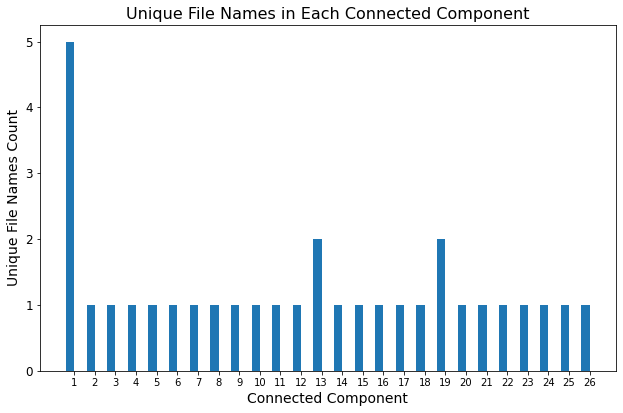

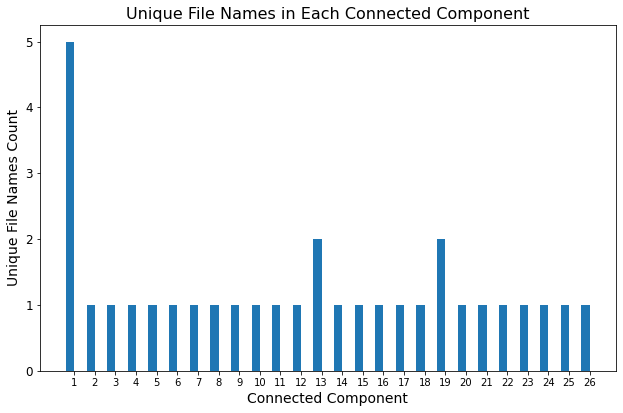

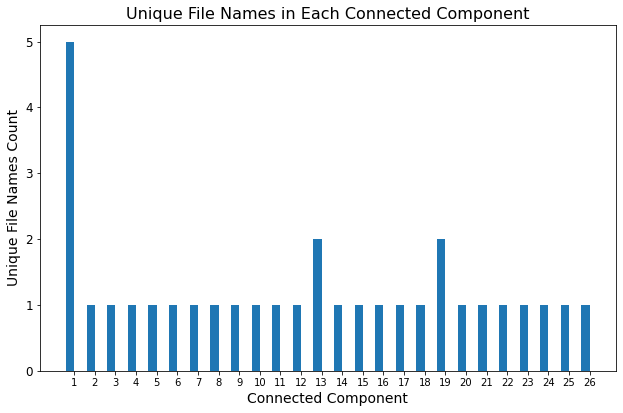

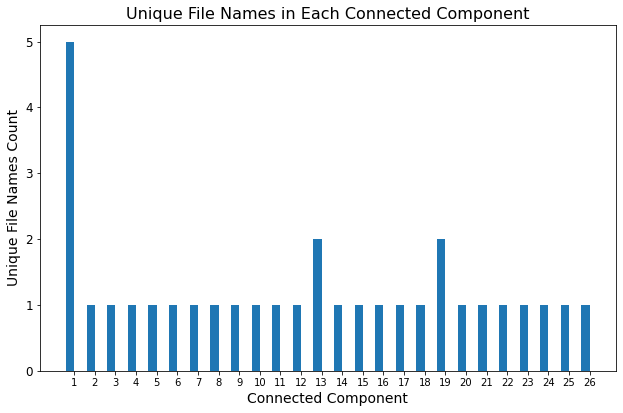

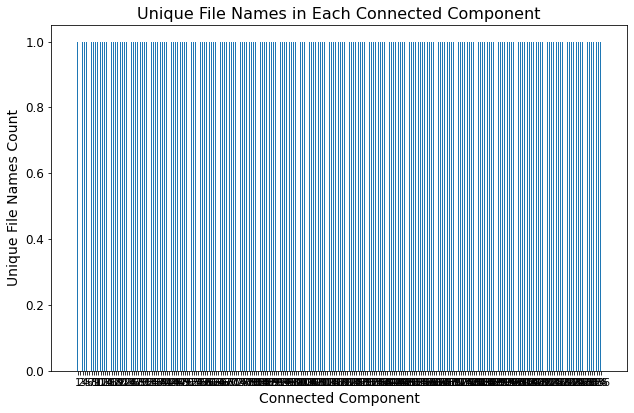

In [75]:
import matplotlib.pyplot as plt
for a in [A, A_k, A_k3, A_k4, L]:
    connected_comps = connected_components(a)
    unique_files = []

    for i, comp in enumerate(connected_comps):
        unique_files_comp = set()
        for idx in comp:
            unique_files_comp.add(data.loc[idx, 'file_name'])
        unique_files.append(unique_files_comp)

    # Plot the unique file names count in each connected component
    component_indices = [i + 1 for i in range(len(unique_files))]
    unique_files_count = [len(files) for files in unique_files]

    # Set figure size
    plt.figure(figsize=(10, 6))

    # Set bar width and spacing
    bar_width = 0.4
    spacing = [i - bar_width / 2 for i in component_indices]

    plt.bar(spacing, unique_files_count, width=bar_width)

    plt.xlabel('Connected Component', fontsize=14)
    plt.ylabel('Unique File Names Count', fontsize=14)
    plt.title('Unique File Names in Each Connected Component', fontsize=16)
    plt.xticks(component_indices, fontsize=10)
    plt.yticks(fontsize=12)

    # Adjust the margins
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.show()


In [ ]:
'''
unique_files = []
for i, comp in enumerate(connected_comps):
    unique_files_comp = set()
    for idx in comp:
        unique_files_comp.add(data.loc[idx, 'file_name'])
    unique_files.append(unique_files_comp)
    print(f"Component {i + 1}:")
    print(f"Unique file names: {unique_files_comp}")
    print()
'''

In [ ]:
'''
connected_comps = connected_components(L)
for i, comp in enumerate(connected_comps):
    print(f"Component {i + 1}:")
    for idx in comp:
        print(f"Index {idx}: {data.loc[idx, 'assistant_reply']}")
    print()
'''

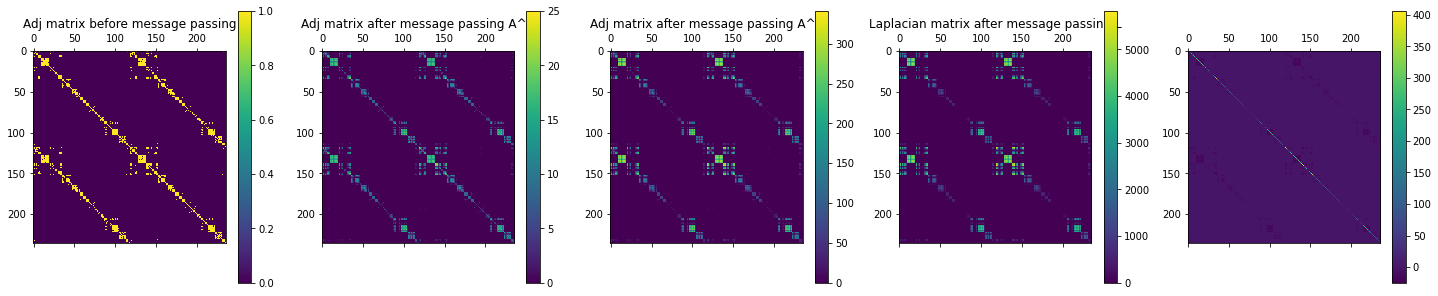

In [80]:
import matplotlib.pyplot as plt
# Visualizing the node features before and after message passing
fig, (ax1, ax2,ax3, ax4, lx5) = plt.subplots(1, 5, figsize=(25, 5))
cax1 = ax1.matshow(A)
ax1.set_title("Adj matrix before message passing")
cax2 = ax2.matshow(A_k)
ax2.set_title("Adj matrix after message passing A^2")
cax3 = ax3.matshow(A_k3)
ax3.set_title("Adj matrix after message passing A^3")
cax4 = ax4.matshow(A_k4)
ax4.set_title("Adj matrix after message passing A^4")
clx5 = lx5.matshow(L)
ax4.set_title("Laplacian matrix after message passing L")
fig.colorbar(cax1, ax=ax1)
fig.colorbar(cax2, ax=ax2)
fig.colorbar(cax3, ax=ax3)
fig.colorbar(cax4, ax=ax4)
fig.colorbar(clx5, ax=lx5)
plt.show()

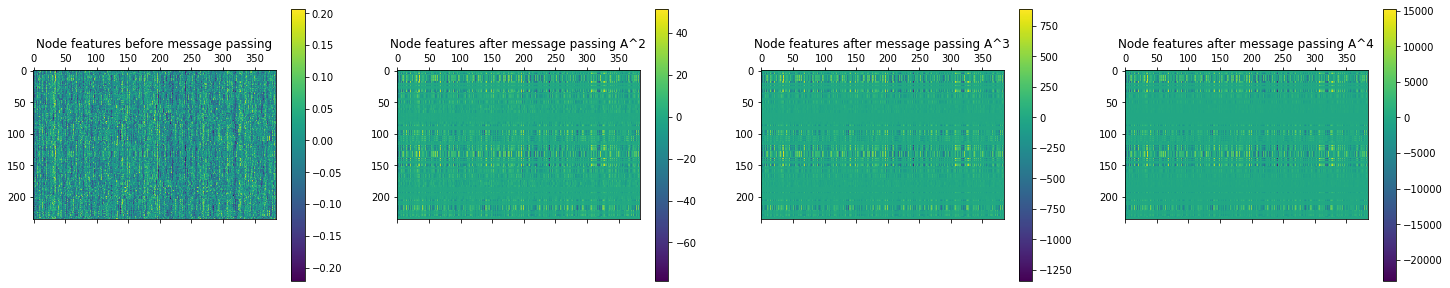

In [81]:
import matplotlib.pyplot as plt
# Visualizing the node features before and after message passing
fig, (ax1, ax2,ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))
cax1 = ax1.matshow(embs)
ax1.set_title("Node features before message passing")
cax2 = ax2.matshow(node_embs)
ax2.set_title("Node features after message passing A^2")
cax3 = ax3.matshow(node_embs3)
ax3.set_title("Node features after message passing A^3")
cax4 = ax4.matshow(node_embs4)
ax4.set_title("Node features after message passing A^4")

fig.colorbar(cax1, ax=ax1)
fig.colorbar(cax2, ax=ax2)
fig.colorbar(cax3, ax=ax3)
fig.colorbar(cax4, ax=ax4)
plt.show()

In [21]:
A_k

array([[82.21375 , 82.21375 , 62.76475 , ..., 69.296394, 59.37149 ,
        64.58403 ],
       [82.21375 , 82.21375 , 62.76475 , ..., 69.296394, 59.37149 ,
        64.58403 ],
       [62.76475 , 62.76475 , 53.45026 , ..., 54.47696 , 47.4187  ,
        50.76499 ],
       ...,
       [69.296394, 69.296394, 54.47696 , ..., 68.10137 , 57.442898,
        58.174835],
       [59.37149 , 59.37149 , 47.418697, ..., 57.442894, 55.590706,
        50.268524],
       [64.58403 , 64.58403 , 50.76499 , ..., 58.17484 , 50.268524,
        56.670044]], dtype=float32)

In [25]:


def load_topic_model(diversity=0.1, min_topic_size=10, nr_topics = "auto"):
    vectorizer_model = CountVectorizer(stop_words="english")
    ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
    representation_model = OpenAI(model="gpt-3.5-turbo", delay_in_seconds=1, chat=True)
    model = SentenceTransformer(MODEL_NAME)
    #representation_model = MaximalMarginalRelevance(diversity=diversity)
    topic_model = BERTopic(
        nr_topics=nr_topics,
        min_topic_size=min_topic_size,
        representation_model=representation_model,
        vectorizer_model=vectorizer_model,
        ctfidf_model=ctfidf_model,
        embedding_model=model,
    )
    return topic_model


def fit_topic_model(topic_model, data, embeddings, key="assistant_reply"):
    topics, probs = topic_model.fit_transform(data[key].to_list(), embeddings)
    return topics, probs


def get_topic_info(topic_model):
    return topic_model.get_topic_info()


def reduce_topics(topic_model, data, nr_topics, key="assistant_reply"):
    topic_model.reduce_topics(data[key].to_list(), nr_topics)
    return topic_model


def get_representative_docs(topic_model):
    return topic_model.get_representative_docs()


def reduce_outliers(topic_model, data, topics, probs, key="assistant_reply", strategy="c-tf-idf"):
    vectorizer_model = CountVectorizer()#stop_words="english")
    ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
    representation_model = OpenAI(model="gpt-3.5-turbo", delay_in_seconds=1, chat=True)
    #representation_model = MaximalMarginalRelevance(diversity=diversity)
    if strategy == "c-tf-idf":
        new_topics = topic_model.reduce_outliers(data[key].to_list(), topics, strategy, threshold=0.1)
    elif strategy == "embeddings":
        new_topics = topic_model.reduce_outliers(data[key].to_list(), topics, strategy)
    elif strategy == "distributions":
        new_topics = topic_model.reduce_outliers(data[key].to_list(), topics, probabilities=probs, strategy=strategy)
    else:
        raise ValueError("Invalid strategy")
    topic_model.update_topics(data[key].to_list(), topics=new_topics, representation_model=representation_model, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model)
    return topic_model, new_topics


def compute_hierarchical_topic_tree(topic_model, data, key="assistant_reply"):
    hierarchical_topics = topic_model.hierarchical_topics(data[key].to_list())
    tree = topic_model.get_topic_tree(hierarchical_topics)
    return hierarchical_topics, tree

In [27]:
from getpass import getpass
import openai
openai_secret = getpass("Enter the secret key: ")
# Set up OpenAI API credentials
openai.api_key = openai_secret

Enter the secret key: ··········


In [28]:
topic_model = load_topic_model(nr_topics = "auto")
topics, probs = fit_topic_model(topic_model, data, node_embs)
freq = get_topic_info(topic_model)
rep_docs = get_representative_docs(topic_model)
freq

,Topic,Count,Name
0,-1,57,-1_Pydantic model for reading and validating w...
1,0,422,0_Pydantic model for worker process performing...
2,1,95,1_Defining `DbRefreshToken` and `DbMessage` cl...
3,2,65,2_Repeatedly checking inference server's healt...
4,3,46,3_ChatUser class behavior and message sending ...
5,4,30,4_Running Migrations in Transaction Mode with ...
6,5,20,5_Handling API Key Authorization in Python___
7,6,14,6_Input prompt truncation based on maximum len...
